<a href="https://colab.research.google.com/github/Harshil1450/Harshil/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Theoritical Part***



---

### **1. What is unsupervised learning in the context of machine learning?**
Unsupervised learning is a type of machine learning where the model is trained on data without labeled responses. The goal is to discover hidden patterns, groupings, or structure in the data, such as clustering or dimensionality reduction.

---

### **2. How does K-Means clustering algorithm work?**
K-Means works by:
1. Initializing `k` centroids randomly.
2. Assigning each data point to the nearest centroid (cluster assignment).
3. Recomputing centroids as the mean of all points in a cluster.
4. Repeating steps 2–3 until convergence (no changes or minimal centroid movement).

---

### **3. Explain the concept of a dendrogram in hierarchical clustering.**
A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It helps visualize the nested grouping of patterns and determine the number of clusters by "cutting" the tree at a chosen level.

---

### **4. What is the main difference between K-Means and Hierarchical Clustering?**
- **K-Means**: Requires the number of clusters `k` in advance and forms flat (non-hierarchical) clusters.
- **Hierarchical**: Does not require specifying `k` and builds a tree of clusters either bottom-up (agglomerative) or top-down (divisive).

---

### **5. What are the advantages of DBSCAN over K-Means?**
- Can find clusters of arbitrary shapes.
- Does not require specifying the number of clusters.
- Identifies noise/outliers naturally.
- Works well with data of varying densities.

---

### **6. When would you use Silhouette Score in clustering?**
Use it to evaluate how well each data point fits within its cluster vs. other clusters. It helps choose the optimal number of clusters and compare different clustering algorithms.

---

### **7. What are the limitations of Hierarchical Clustering?**
- Computationally expensive (especially for large datasets).
- Sensitive to noise and outliers.
- Once a merge/split is done, it cannot be undone.
- Choice of linkage and distance metric greatly affects results.

---

### **8. Why is feature scaling important in clustering algorithms like K-Means?**
Because K-Means relies on distance measures (typically Euclidean), unscaled features can dominate and skew the clustering results. Scaling ensures all features contribute equally.

---

### **9. How does DBSCAN identify noise points?**
Points that do not belong to any cluster (i.e., not core points and not density-reachable from any core point) are labeled as **noise** or **outliers**.

---

### **10. Define inertia in the context of K-Means.**
Inertia is the sum of squared distances between each point and its assigned cluster centroid. Lower inertia indicates tighter clusters.

---

### **11. What is the elbow method in K-Means clustering?**
It's a technique to choose the optimal number of clusters by plotting inertia vs. number of clusters and finding the "elbow" point—where the rate of decrease sharply slows.

---

### **12. Describe the concept of "density" in DBSCAN.**
Density refers to the number of points within a given radius (`eps`). A region with high density has many points close together and forms a cluster.

---

### **13. Can hierarchical clustering be used on categorical data?**
Yes, but it requires a suitable distance metric for categorical data, such as Hamming or Jaccard distance, and cannot use traditional Euclidean distance.

---

### **14. What does a negative Silhouette Score indicate?**
That a sample might be assigned to the wrong cluster, as it is closer to a neighboring cluster than to its own.

---

### **15. Explain the term "linkage criteria" in hierarchical clustering.**
Linkage criteria determine how the distance between clusters is calculated:
- **Single linkage**: shortest distance between points.
- **Complete linkage**: longest distance.
- **Average linkage**: average distance.
- **Ward’s method**: minimizes variance within clusters.

---

### **16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**
Because it assumes clusters are spherical and of equal size/density. It struggles with irregular shapes and varying densities.

---

### **17. What are the core parameters in DBSCAN, and how do they influence clustering?**
- **eps (ε)**: maximum distance for two points to be considered neighbors.
- **min_samples**: minimum number of neighbors to form a dense region.
They determine what constitutes a core point and affect cluster formation and noise detection.

---

### **18. How does K-Means++ improve upon standard K-Means initialization?**
It spreads out the initial centroids by selecting them based on probability proportional to their distance from existing centroids, reducing the chance of poor local minima.

---

### **19. What is agglomerative clustering?**
A type of hierarchical clustering where each data point starts as its own cluster, and pairs of clusters are merged step by step based on a linkage criterion until all points are in one cluster or a stopping condition is met.

---

### **20. What makes Silhouette Score a better metric than just inertia for model evaluation?**
Silhouette Score considers **both cohesion and separation**, giving a more holistic view of cluster quality, while inertia only looks at within-cluster compactness and can favor too many clusters.

---


***Practical Part***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

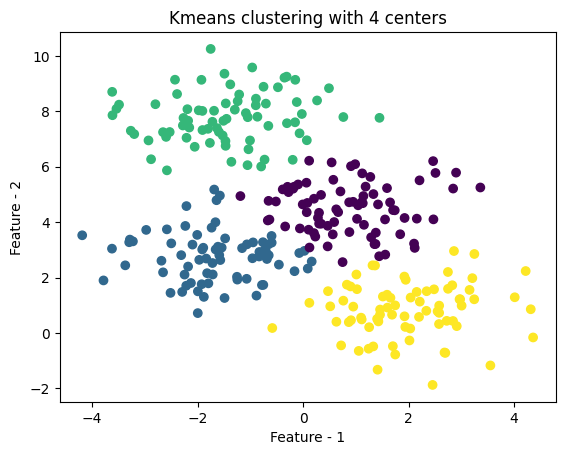

In [2]:
#Q-21>>
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y = make_blobs(n_samples = 300,centers = 4,random_state = 0)
kmeans = KMeans(n_clusters = 4,random_state = 0)
labels = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels)
plt.title("Kmeans clustering with 4 centers")
plt.xlabel("Feature - 1")
plt.ylabel("Feature - 2")
plt.show()

In [3]:
#Q-22>>
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
data = load_iris()
X=data.data
y=data.target
model = AgglomerativeClustering(n_clusters=3)
labels=model.fit_predict(X)
print(labels[:10])

[1 1 1 1 1 1 1 1 1 1]


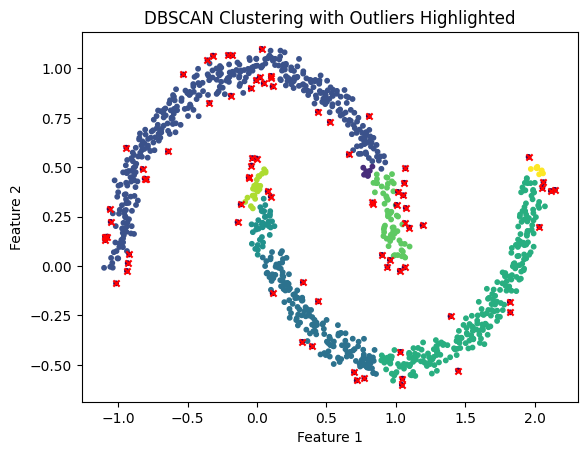

In [4]:
#Q-23>>
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.05)
dbscan = DBSCAN(eps=0.05,min_samples=5)
labels = dbscan.fit_predict(X)
outliers = X[labels == -1]
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=20)
plt.title('DBSCAN Clustering with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
#Q-24>>
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
X = wine.data
y = wine.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X_scaled)
unique, counts = np.unique(labels, return_counts=True)  # Get unique labels and their counts
cluster_sizes = dict(zip(unique, counts))  # Create a dictionary of cluster sizes
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")  # Print the size of each cluster

Cluster 0: 67 samples
Cluster 1: 49 samples
Cluster 2: 62 samples


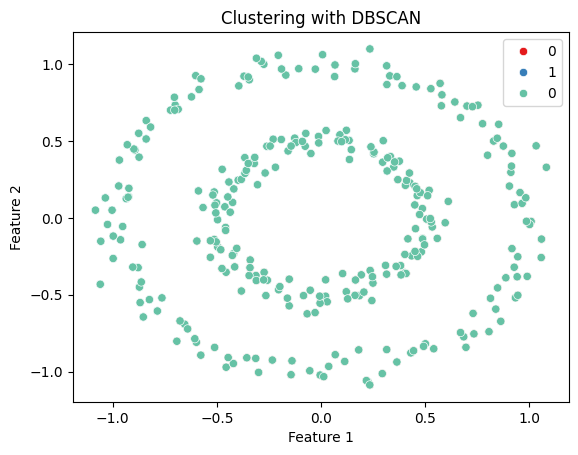

In [6]:
#Q-25>>
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5)
model = AgglomerativeClustering(n_clusters=2)
db = DBSCAN(eps=0.5, min_samples=5)
labels_agg = model.fit_predict(X)
labels_db = db.fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_agg, palette='Set1')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_db, palette='Set2')
plt.title('Clustering with DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
#Q-26>>
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X = bc.data
y = bc.target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 2)
labels = kmeans.fit(X_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


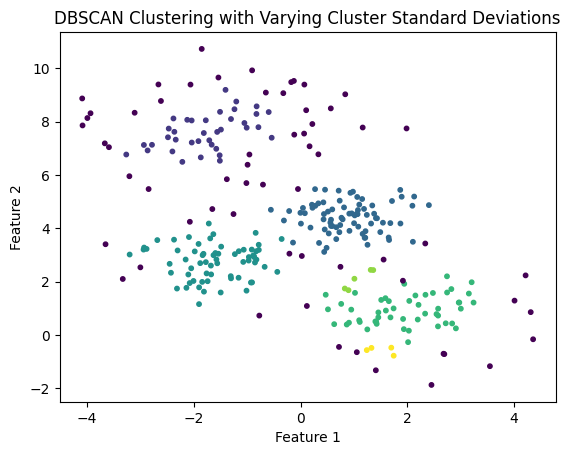

In [8]:
#Q-27>>
X,_=make_blobs(n_samples = 300,centers = 4,cluster_std=[0.6, 1.0, 0.8, 1.2],random_state = 0)
db = DBSCAN(eps = 0.5,min_samples = 5)
labels = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering with Varying Cluster Standard Deviations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

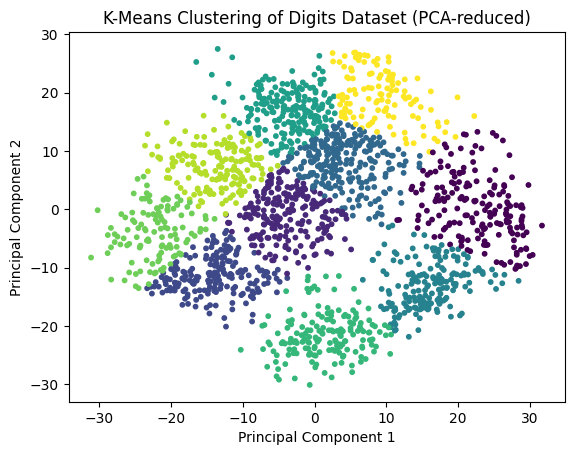

In [9]:
#Q-28>>>
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X = digits.data
y = digits.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title('K-Means Clustering of Digits Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

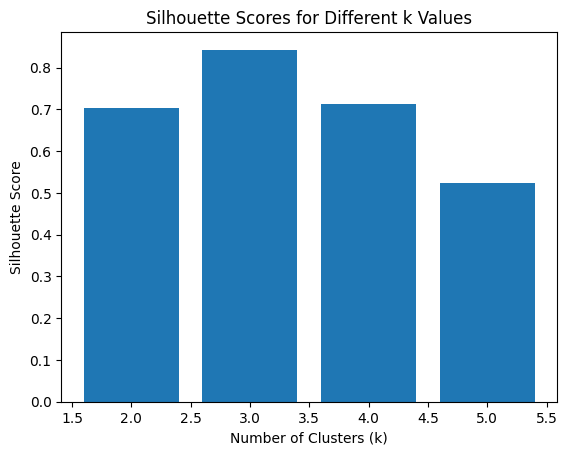

In [10]:
#Q-29>>
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300,centers = 4)
K_values = range(2, 6)
silhouette_scores = []
for i in K_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
plt.bar(K_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.show()


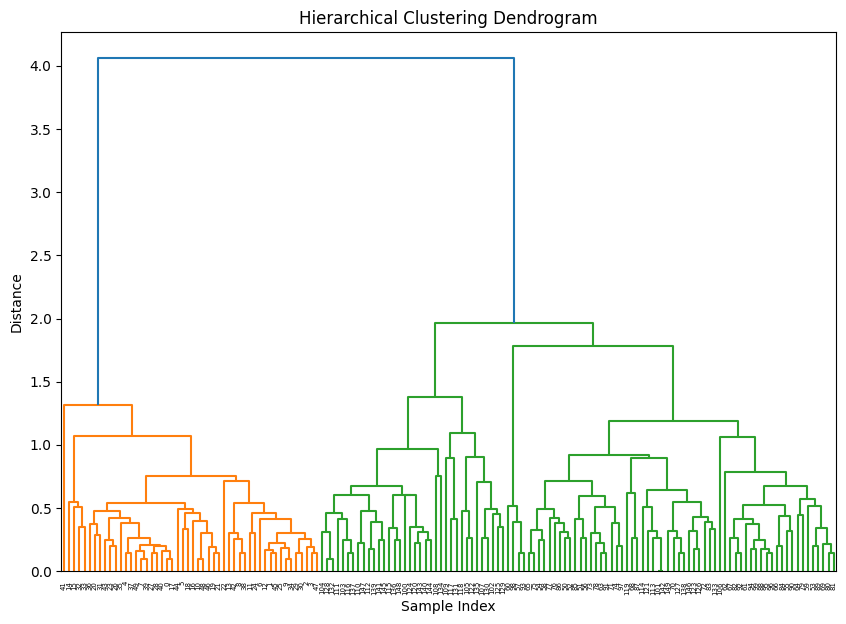

In [11]:
#Q-30>>
from scipy.cluster.hierarchy import dendrogram, linkage
iris = load_iris()
X = iris.data
linked = linkage(X, 'average')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

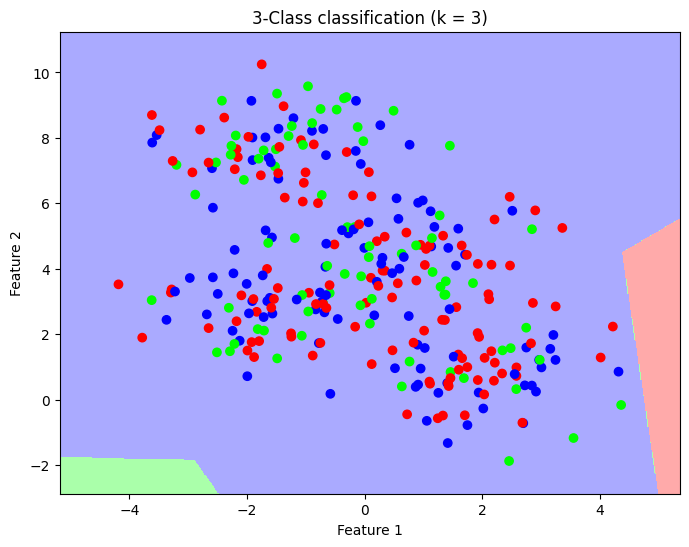

In [12]:
#Q-31>>
from matplotlib.colors import ListedColormap
X,_ = make_blobs(n_samples = 300,centers =4,random_state = 0)
km = KMeans(n_clusters = 3,random_state = 0)
labels = km.fit_predict(X)
# Step size in the mesh
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (3))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

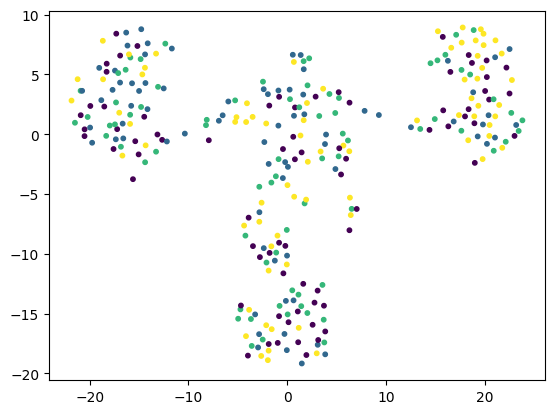

In [13]:
#Q-32>>
from sklearn.manifold import TSNE
digits = TSNE(n_components  = 2,random_state = 4)
X_reduced = digits.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=10)

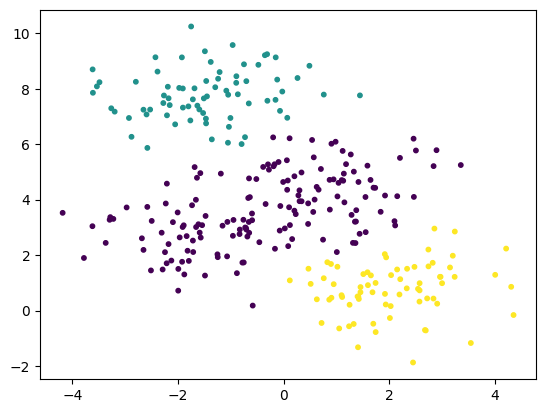

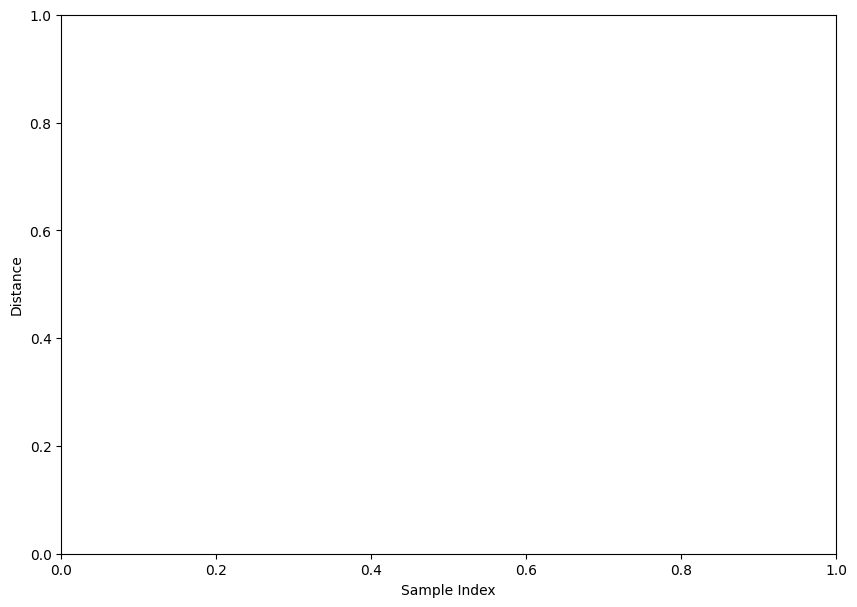

In [14]:
#Q-33>>
X,_=make_blobs(n_samples = 300,centers = 4,random_state = 0)
agc = AgglomerativeClustering(n_clusters = 3)
labels = agc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.figure(figsize=(10, 7))
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

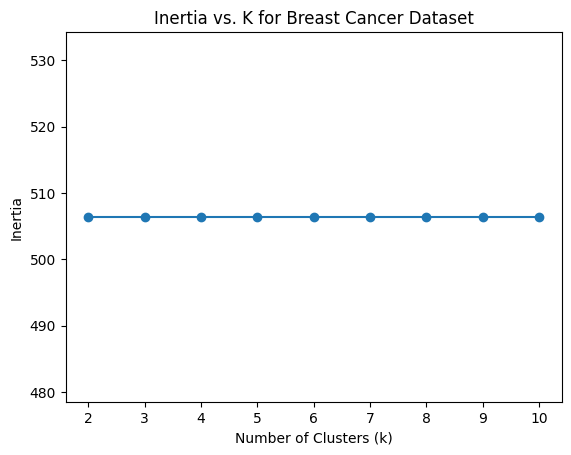

In [15]:
#Q-34>>
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X=bc.data
kvalues = range(2, 11)
inertia_values = []
for i in kvalues:
  km = KMeans(n_clusters = 1,random_state=1)
  km.fit(X)
  inertia_values.append(kmeans.inertia_)
plt.plot(kvalues, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. K for Breast Cancer Dataset')
plt.show()

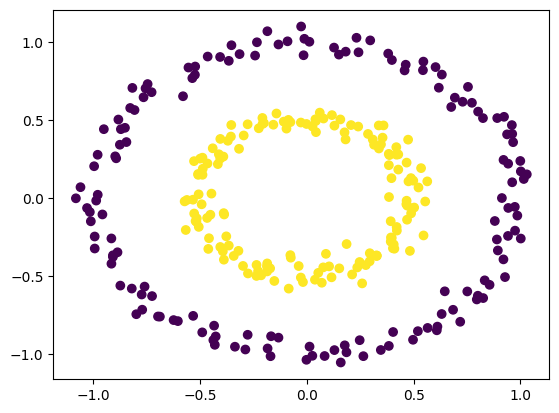

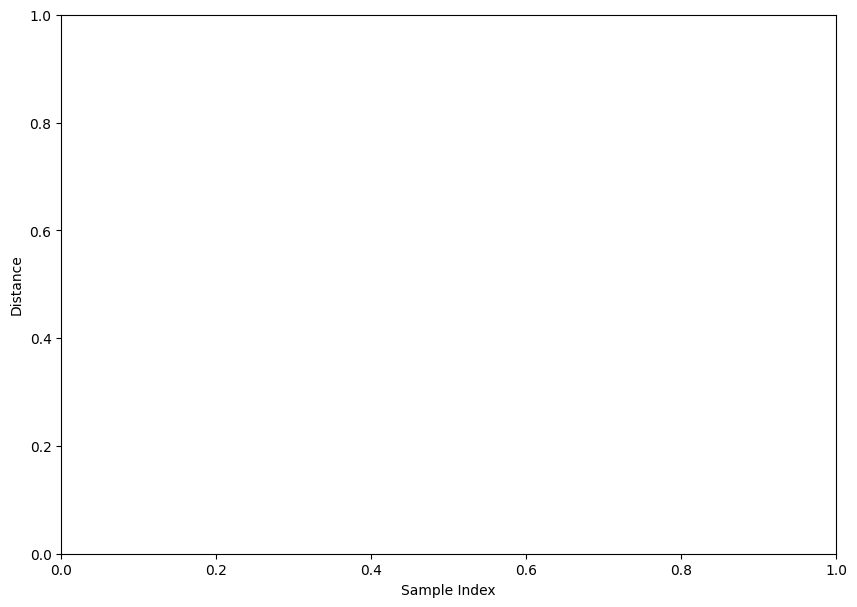

In [18]:
#Q-35>>
from sklearn.datasets import make_circles
X,y= make_circles(n_samples= 300,noise = 0.05,factor = 0.5)
agc= AgglomerativeClustering(n_clusters = 2,linkage='single')
labels = agc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.figure(figsize=(10, 7))
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [23]:
#Q-36>>
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
X=wine.data
x_scaled = StandardScaler().fit_transform(X)
dbs = DBSCAN(eps=0.5, min_samples=5)
labels = dbs.fit_predict(x_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters (excluding noise): {n_clusters}")
unique, counts = np.unique(labels, return_counts=True)  # Get unique labels and their counts
cluster_sizes = dict(zip(unique, counts))  # Create a dictionary of cluster sizes
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")  # Print the size of each cluster

Number of clusters (excluding noise): 0
Cluster -1: 178 samples


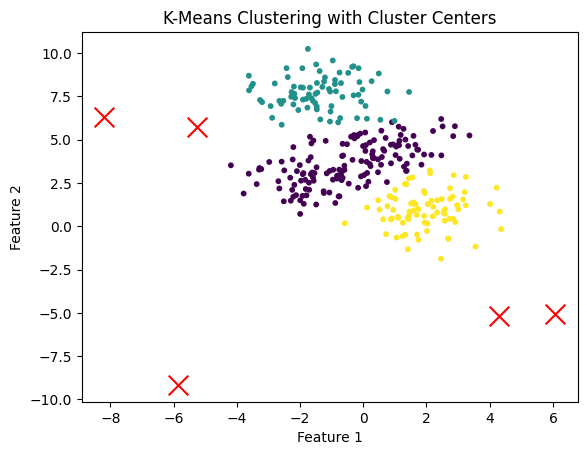

In [24]:
#Q=37>>
X,_= make_blobs(n_samples = 300,centers = 4,random_state = 0)
km = KMeans(n_clusters = 3)
labels = km.fit_predict(X)
cluster_centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='x',s=200,c='red')
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [27]:
#Q-38>>>
iris = load_iris()
X = iris.data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)
noise_samples = sum(1 for i in labels if i == -1)
print(f"Number of noise samples: {noise_samples}")

Number of noise samples: 17


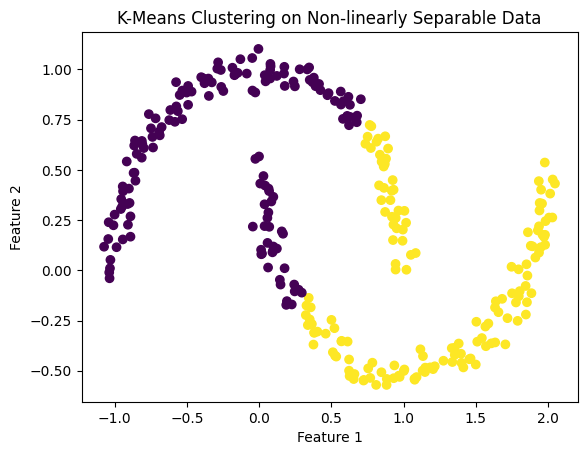

In [28]:
#Q-39>>
X, y = make_moons(n_samples=300, noise=0.05)
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering on Non-linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

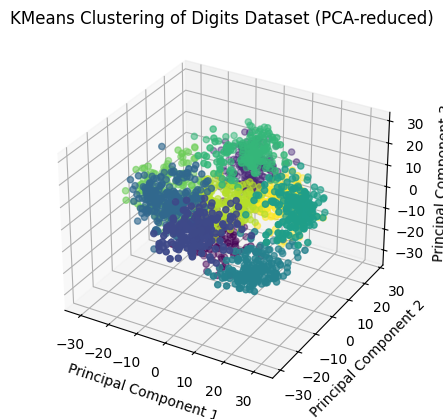

In [29]:
#Q-40>>
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X = digits.data
# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)
# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=0)  # Assuming 10 clusters for digits 0-9
labels = kmeans.fit_predict(X_reduced)
# Visualize with a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis')
ax.set_title('KMeans Clustering of Digits Dataset (PCA-reduced)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [33]:
#Q-41>>
X,_ = make_blobs(n_samples = 200,centers = 5,random_state = 0)
km = KMeans(n_clusters = 5,random_state = 0)
labels = km.fit_predict(X)
SS = silhouette_score(X, labels)
print(f"Silhouette Score: {SS}")

Silhouette Score: 0.5535512698798114


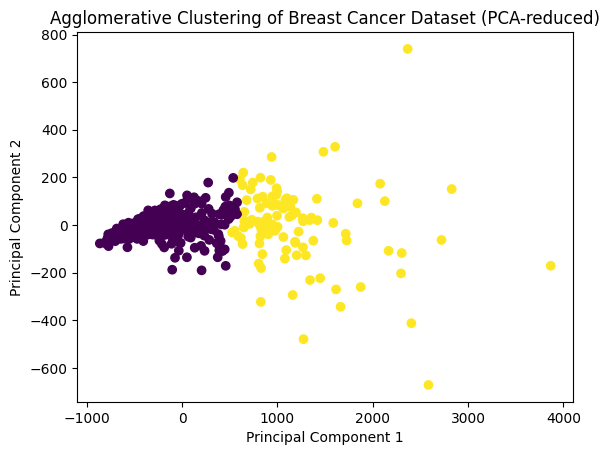

In [34]:
#Q-42>>
from sklearn.datasets import load_breast_cancer
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_reduced = pca.fit_transform(X)
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)  # Assuming 2 clusters
labels = agg_clustering.fit_predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering of Breast Cancer Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

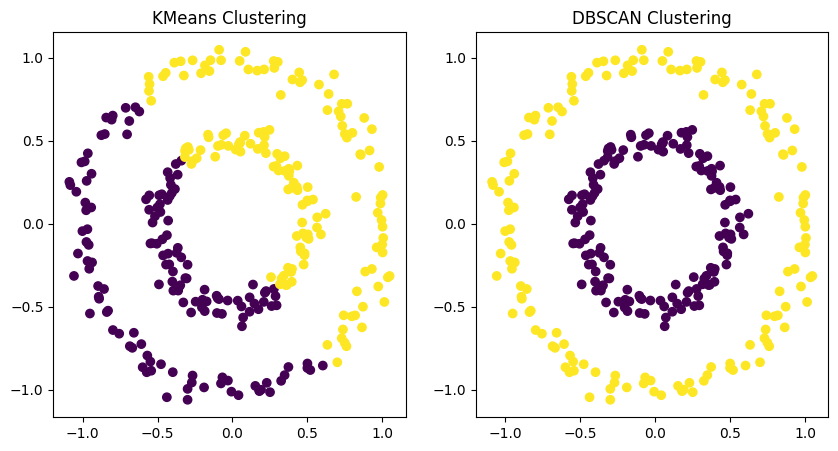

In [35]:
#Q-43>>
X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax1.set_title('KMeans Clustering')
ax2.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax2.set_title('DBSCAN Clustering')
plt.show()

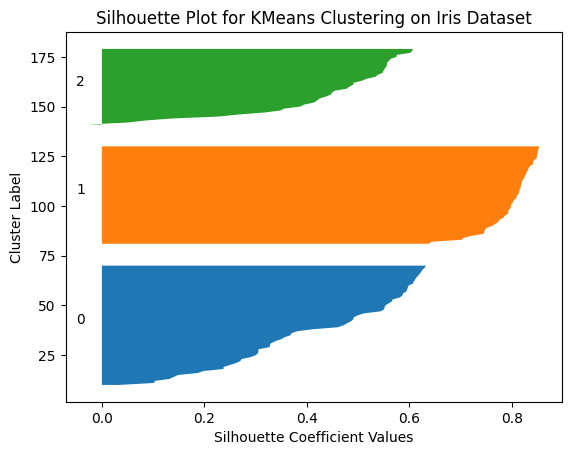

In [36]:
#Q-44>>
from sklearn.metrics import silhouette_samples
iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)
silhouette_values = silhouette_samples(X, labels)
y_lower = 10
for i in range(3):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # Label clusters
    y_lower = y_upper + 10  # Update starting position
plt.title('Silhouette Plot for KMeans Clustering on Iris Dataset')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.show()

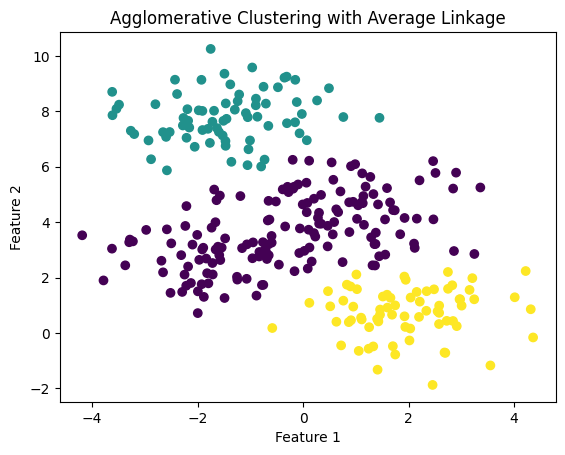

In [38]:
#Q-45>>
X,_ = make_blobs(n_samples = 300,centers = 4,random_state = 0)
agc = AgglomerativeClustering(n_clusters = 3,linkage='average')
labels = agc.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c= labels,cmap = 'viridis')
plt.title('Agglomerative Clustering with Average Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

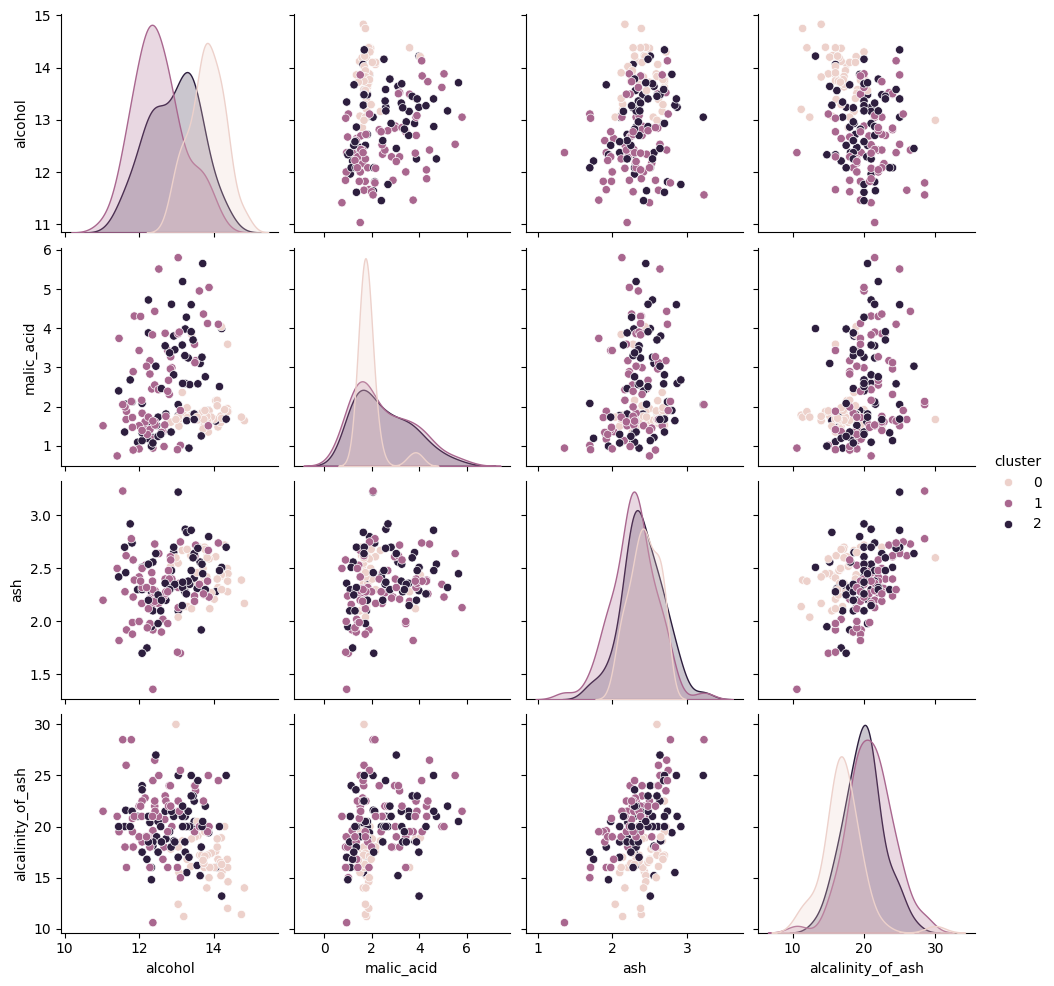

In [41]:
#Q-46>>
wine=load_wine()
X=wine.data
km=KMeans(n_clusters = 3)
labels = km.fit_predict(X)
df=pd.DataFrame(X[:,:4],columns=wine.feature_names[:4])
df['cluster']=labels
sns.pairplot(df,hue='cluster')
plt.show()

In [44]:
#Q-47>>
X,_ = make_blobs(n_samples = 300,centers = 4,cluster_std = 0.60,random_state = 0)
dbs = DBSCAN(eps = 0.5,min_samples = 5)
labels = dbs.fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 4
Number of noise points: 18


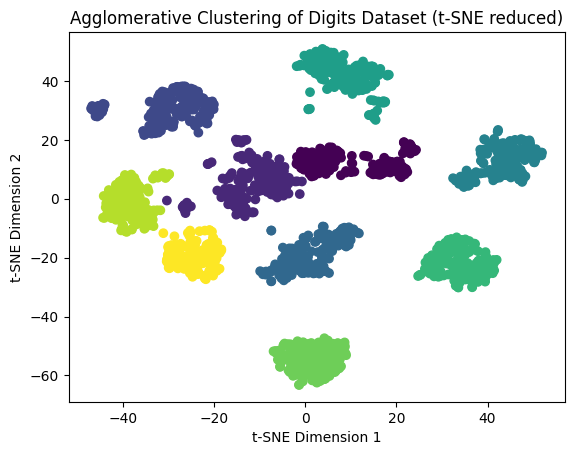

In [45]:
#Q-48>>
from sklearn.manifold import TSNE
digits = load_digits()
X=digits.data
tsne = TSNE(n_components=2, random_state=0)
X_reduced = tsne.fit_transform(X)
acg= AgglomerativeClustering(n_clusters=10)
labels = acg.fit_predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering of Digits Dataset (t-SNE reduced)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()